# Classification Model Comparison with Graph

In [4]:

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [5]:

df = pd.read_csv('adult.csv')

le = LabelEncoder()
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col])

X = df.drop(df.columns[-1], axis=1)
y = df[df.columns[-1]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)


In [6]:

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(max_depth=10),
    "Random Forest": RandomForestClassifier(n_estimators=150),
    "SVM": SVC()
}

results = []

for name, model in models.items():
    if name in ["Logistic Regression", "SVM"]:
        model.fit(X_train_s, y_train)
        preds = model.predict(X_test_s)
    else:
        model.fit(X_train, y_train)
        preds = model.predict(X_test)

    results.append([
        name,
        accuracy_score(y_test, preds),
        precision_score(y_test, preds),
        recall_score(y_test, preds),
        f1_score(y_test, preds)
    ])

res = pd.DataFrame(results, columns=["Model","Accuracy","Precision","Recall","F1"])
res


,Model,Accuracy,Precision,Recall,F1
0,Logistic Regression,0.825580,0.705641,0.447625,0.547771
1,Decision Tree,0.859358,0.766982,0.580351,0.660741
2,Random Forest,0.853063,0.727630,0.603123,0.659552
3,SVM,0.849532,0.753874,0.538061,0.627942


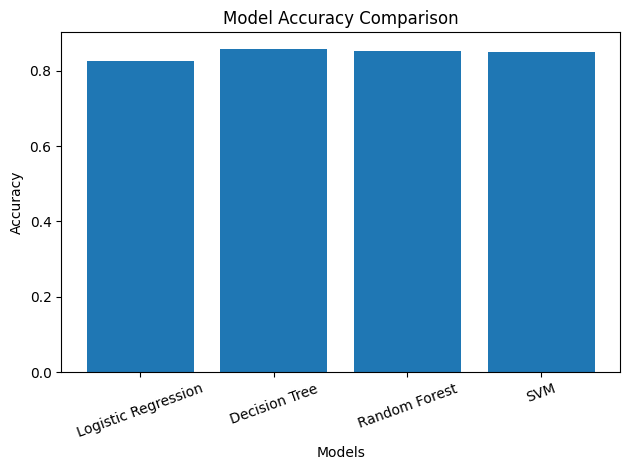

In [7]:

# Plot Accuracy Comparison
plt.figure()
plt.bar(res["Model"], res["Accuracy"])
plt.xticks(rotation=20)
plt.title("Model Accuracy Comparison")
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.show()
